In [72]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [73]:
image_path = "/home/sirius/ksant/pyto/SiriusFaceRec/BB_detector/curve/scar2.jpeg"

In [74]:
import os.path
os.path.exists(image_path)

True

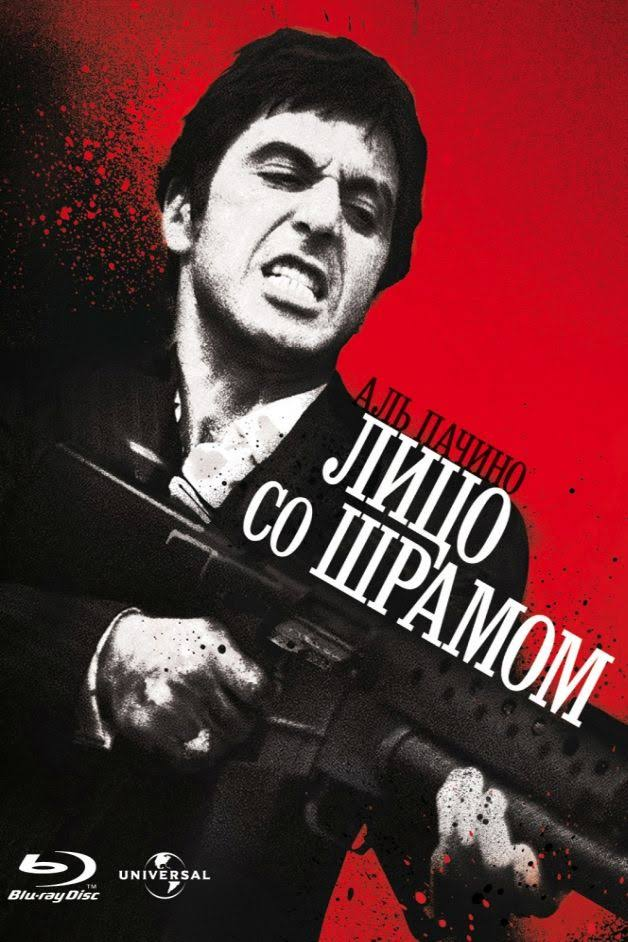

In [75]:
from IPython.display import Image
Image(filename=image_path) 

In [76]:
from PIL import Image

im = Image.open(image_path)

In [77]:
def expand2square(pil_img, background_color):
    width, height = pil_img.size
    if width == height:
        return pil_img
    elif width > height:
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return result
    else:
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        return result

In [78]:

im_new = expand2square(im, (0, 0, 0))
print (im_new.size)
im_new.save('expand_square.jpg', quality=95)

(942, 942)


In [79]:
size = 640, 640
im_new.thumbnail(size, Image.ANTIALIAS)
im_new.size

(640, 640)

In [80]:
im_new.save('expand_square.jpg', quality=95)

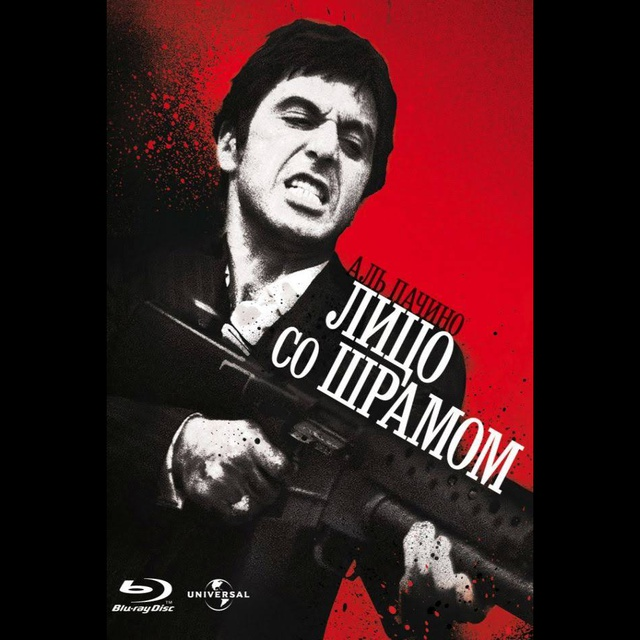

In [86]:
from IPython.display import Image
Image(filename='expand_square.jpg') 

In [81]:
img = np.float32(im_new)

In [82]:
img -= (104, 117, 123)

In [83]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

In [84]:
img

array([[[-104., -117., -123.],
        [-104., -117., -123.],
        [-104., -117., -123.],
        ...,
        [-104., -117., -123.],
        [-104., -117., -123.],
        [-104., -117., -123.]],

       [[-104., -117., -123.],
        [-104., -117., -123.],
        [-104., -117., -123.],
        ...,
        [-104., -117., -123.],
        [-104., -117., -123.],
        [-104., -117., -123.]],

       [[-104., -117., -123.],
        [-104., -117., -123.],
        [-104., -117., -123.],
        ...,
        [-104., -117., -123.],
        [-104., -117., -123.],
        [-104., -117., -123.]],

       ...,

       [[-104., -117., -123.],
        [-104., -117., -123.],
        [-104., -117., -123.],
        ...,
        [-104., -117., -123.],
        [-104., -117., -123.],
        [-104., -117., -123.]],

       [[-104., -117., -123.],
        [-104., -117., -123.],
        [-104., -117., -123.],
        ...,
        [-104., -117., -123.],
        [-104., -117., -123.],
        [-104.,

In [70]:
img /= std

In [64]:
import numpy as np
from PIL import Image

def normalize(arr):

    arr = arr.astype('float32')
    arr -= (104, 117, 123)
    std = [0.229*255, 0.224*255, 0.225*255]
    # Do not touch the alpha channel
    for i in range(3):
        arr *= (255.0/(maxval-minval))
    return arr

def demo_normalize(FILENAME):
    img = Image.open(FILENAME).convert('RGB')
    arr = np.array(img)
    new_img = Image.fromarray(normalize(arr).astype('uint8'),'RGB')
    new_img.save('normalized.png')

In [65]:
demo_normalize("expand_square.jpg")